# Lecture 1 - Task 1: Approximating a Sine Function

The following tutorial is based on https://pytorch.org/tutorials/beginner/pytorch_with_examples.html 

In [1]:
# We are going to code this all by hand so we will of course need trusty old NumPy.
import numpy as np
import matplotlib.pyplot as plt  # Useful for plotting.

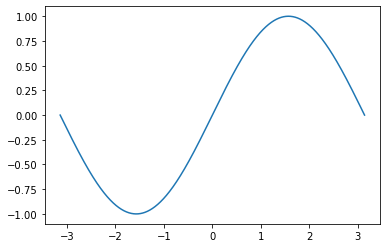

In [2]:
# Create our input and "ground truth" output data.
# Out output will be a sine function over the interval [-pi, pi].
x = np.linspace(-np.pi, np.pi, 2000)
y = np.sin(x)

plt.plot(x, y)
plt.show()

***
### Task: using backpropagation, develop a neuron that can learn the coefficients of a third order polynomial that best approximate a sine function.

1. I have started you off with the hyper parameters you will need (you can change these values if you like).
2. You probably need to define the polynomial and its coefficients that you "learn".
3. You will need some sort of loss function.
4. Randomly initiate (or don't) the weights that, in this case, are the coefficients of our polynomial.
5. Calculate the gradient and update the weights (hint: we just covered the equations to do this in the slides before exercise 1). You should try to only use one for loop.
6. Plot your results (if you aren't too familiar with matplotlib, plt.plot(x,y) can be called multiple times in a cell to plot data all on the same graph).
7. What happens if you run for more or fewer epochs?
8. What happens if you change the learning rate? How does your loss function change during training as a result?

*** Hints***
<details> <summary>Show / Hide</summary> 
<p>
The equation of a polynomial is of the form $y=a+bx+cx^2+dx^3$
    
You will need to loop over a number of epochs. 
   
The result of applying your loss function (and also the gradients for each coefficient) should be a single value. To achieve this, you need to add up all the differences. np.sum() may be your friend and easier than loops.
</p>
</details>

In [3]:
# Define the hyper parameters: learning rate and number of epochs.
lr = 1e-6
epochs = 2000

In [4]:
# Randomly initialise the polynomial coefficients.
a = np.random.rand()
b = np.random.rand()
c = np.random.rand()
d = np.random.rand()

# Iterate over the set number of epochs.
for i in range(epochs):
    # Calculate y values for each value in the fixed interval
    # for the polynomial approximation.
    y_pred = a + b*x + c*x**2 + d*x**3

    # Display the loss every 100 epochs.
    if i % 100 == 0:
        loss = np.mean(np.square(y-y_pred))
        print(loss)

    # Calculate the gradient of the loss function.
    grad_y_pred = 2*(y_pred-y)

    # Update each coefficient using the learning rate
    # and gradient with respect to the loss function.
    a -= lr * np.sum(grad_y_pred)
    b -= lr * np.sum(grad_y_pred * x)
    c -= lr * np.sum(grad_y_pred * x**2)
    d -= lr * np.sum(grad_y_pred * x**3)

# Display the equation of the third order polynomial approximation.
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

140.17071597356033
0.23027302009451472
0.16154203581509838
0.11381915189927316
0.08065271970905945
0.05758232240679185
0.04152093708549599
0.03032991620969179
0.02252618635446416
0.017080312956116665
0.013277082649620233
0.010619146684750657
0.008760356583311526
0.007459595786611559
0.006548774271686907
0.005910620096428709
0.005463254634206877
0.00514946969057903
0.004929266711371528
0.0047746612999003965
Result: y = 0.02298710343303231 + 0.8502090232810474 x + -0.0039656578492502596 x^2 + -0.0924012945546692 x^3


In [5]:
# Calculate the predicted output using the trained coefficients.
y_pred = a + b*x + c*x**2 + d*x**3

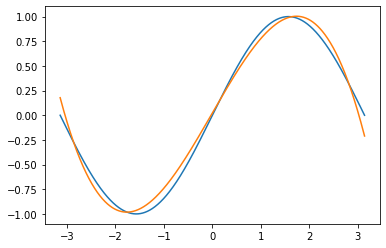

In [6]:
# Plot the ground truths and predictions on the same axis.
plt.plot(x,y)
plt.plot(x,y_pred)
plt.show()